# HOUSING PRICE PREDICTION


### BASIC EDA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv("C:/Users/augus/Downloads/house_price.csv")

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [3]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [4]:
data.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

### DETECT OUTLIERS

In [7]:
# Using Mean and Standard Deviation
mean = data['price_per_sqft'].mean()
std_deviation = data['price_per_sqft'].std()
cut_off = std_deviation * 3

lower = mean - cut_off
upper = mean + cut_off

no_outliers_std = data[(data['price_per_sqft'] >= lower) & (data['price_per_sqft'] <= upper)]
no_outliers_std

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [8]:
# Using Percentile Method
lower_percentile = data['price_per_sqft'].quantile(0.01)
upper_percentile = data['price_per_sqft'].quantile(0.99)

no_outliers_percentile = data[(data['price_per_sqft'] >= lower_percentile) & (data['price_per_sqft'] <= upper_percentile)]
no_outliers_percentile

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [9]:
# Using IQR(Inner Quartile Range) Method
Q1 = data['price_per_sqft'].quantile(0.25)
Q3 = data['price_per_sqft'].quantile(0.75)
iqr = Q3 - Q1

lower_bound = Q1 - 1.5 * iqr
upper_bound = Q3 + 1.5 * iqr

no_outliers_iqr = data[(data['price_per_sqft'] >= lower_bound) & (data['price_per_sqft'] <= upper_bound)]
no_outliers_iqr

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [10]:
# Using Zsccore Method
from scipy.stats import zscore

data['z_score'] = zscore(data['price_per_sqft'])
no_outliers_zscore = data[(data['z_score'].abs() <= 3)]
no_outliers_zscore

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039554
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.030971
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.033876
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.015698
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034391
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.011538
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.029897
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.024946
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.023300


#### BOX PLOT

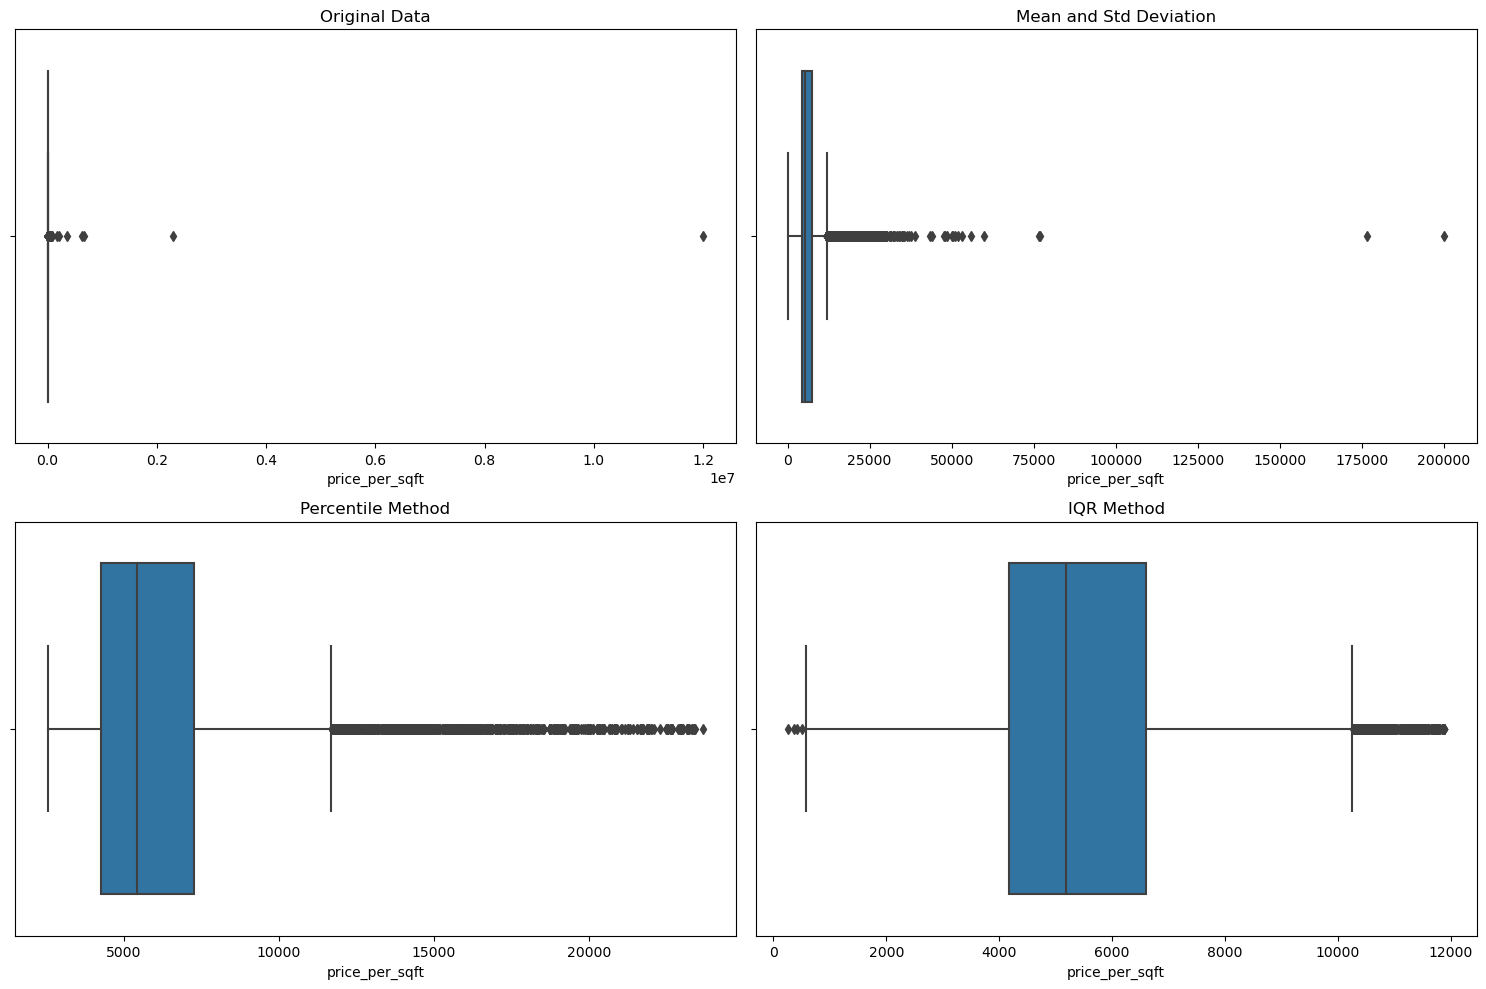

In [11]:
# To find which method is best for removing outliers
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x=data['price_per_sqft'])
plt.title('Original Data')

plt.subplot(2, 2, 2)
sns.boxplot(x=no_outliers_std['price_per_sqft'])
plt.title('Mean and Std Deviation')

plt.subplot(2, 2, 3)
sns.boxplot(x=no_outliers_percentile['price_per_sqft'])
plt.title('Percentile Method')

plt.subplot(2, 2, 4)
sns.boxplot(x=no_outliers_iqr['price_per_sqft'])
plt.title('IQR Method')

plt.tight_layout()
plt.show()

#### HIST PLOT BEFORE TRANSFORMATION

In [12]:
# Skewness before transformation
print("Skewness before transformation:")
skewness_before = data['price_per_sqft'].skew()
print(skewness_before)

# Kurtosis before transformation
print("Kurtosis before transformation:")
kurtosis_before = data['price_per_sqft'].kurtosis()
print(kurtosis_before)

Skewness before transformation:
108.28105529705168
Kurtosis before transformation:
12095.21502832288


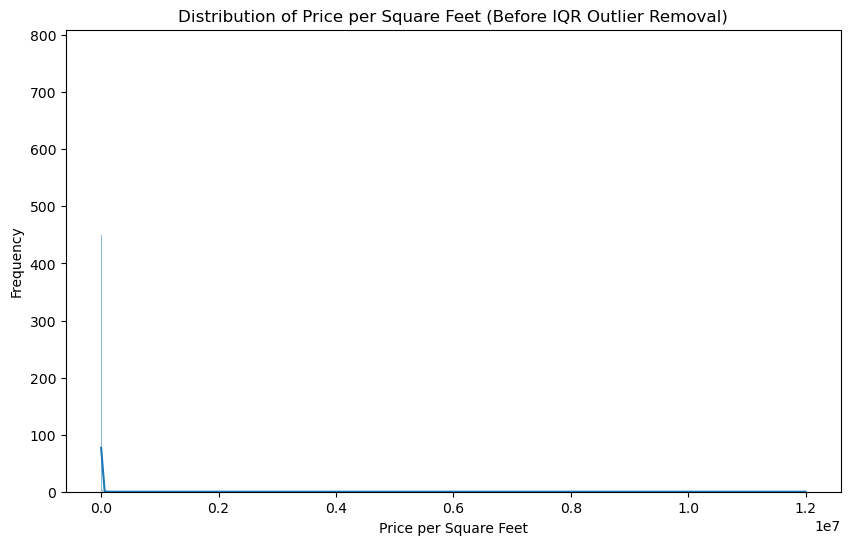

In [18]:
# Hist plot before transformation
plt.figure(figsize=(10, 6))
sns.histplot(data['price_per_sqft'], kde=True)
plt.title('Distribution of Price per Square Feet (Before IQR Outlier Removal)')
plt.xlabel('Price per Square Feet')
plt.ylabel('Frequency')
plt.show()

#### HIST PLOT AFTER TRANSFORMATION

In [20]:
# Skewness after transformation
import numpy as np

data['price_per_sqft_log'] = np.log1p(data['price_per_sqft'])

print("Skewness after transformation:")
skewness_after = data['price_per_sqft_log'].skew()
print(skewness_after)

# kurtosis dfter transformation
print("Kurtosis after transformation:")
kurtosis_after = data['price_per_sqft_log'].kurtosis()
print(kurtosis_after)

Skewness after transformation:
1.4004850530059296
Kurtosis after transformation:
9.206942162860814


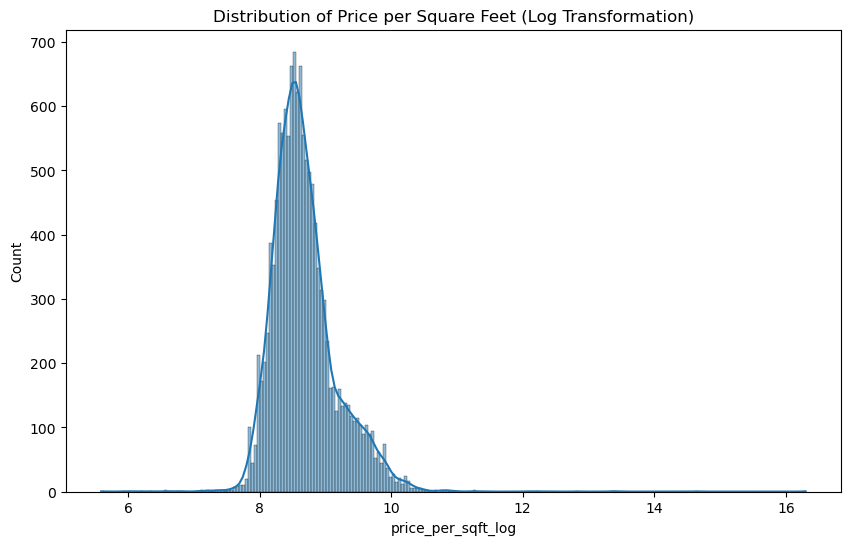

In [21]:
# Hist plot after transformation
plt.figure(figsize=(10, 6))
sns.histplot(data['price_per_sqft_log'], kde=True)
plt.title('Distribution of Price per Square Feet (Log Transformation)')
plt.show()

#### CORRELATION BETWEEN ALL THE NUMERICAL COLUMNS

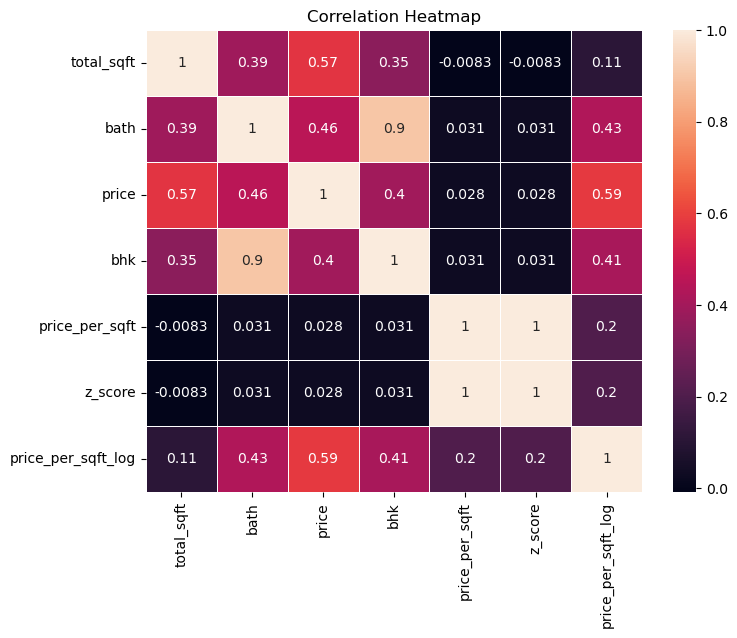

In [22]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(8, 6))
corr = numerical_data.corr()
sns.heatmap(corr, annot=True, cmap=None, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#### SCATTER PLOT BETWEEN NUMERICAL VARIABLES

C:\Users\augus\anaconda new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1400x1000 with 0 Axes>

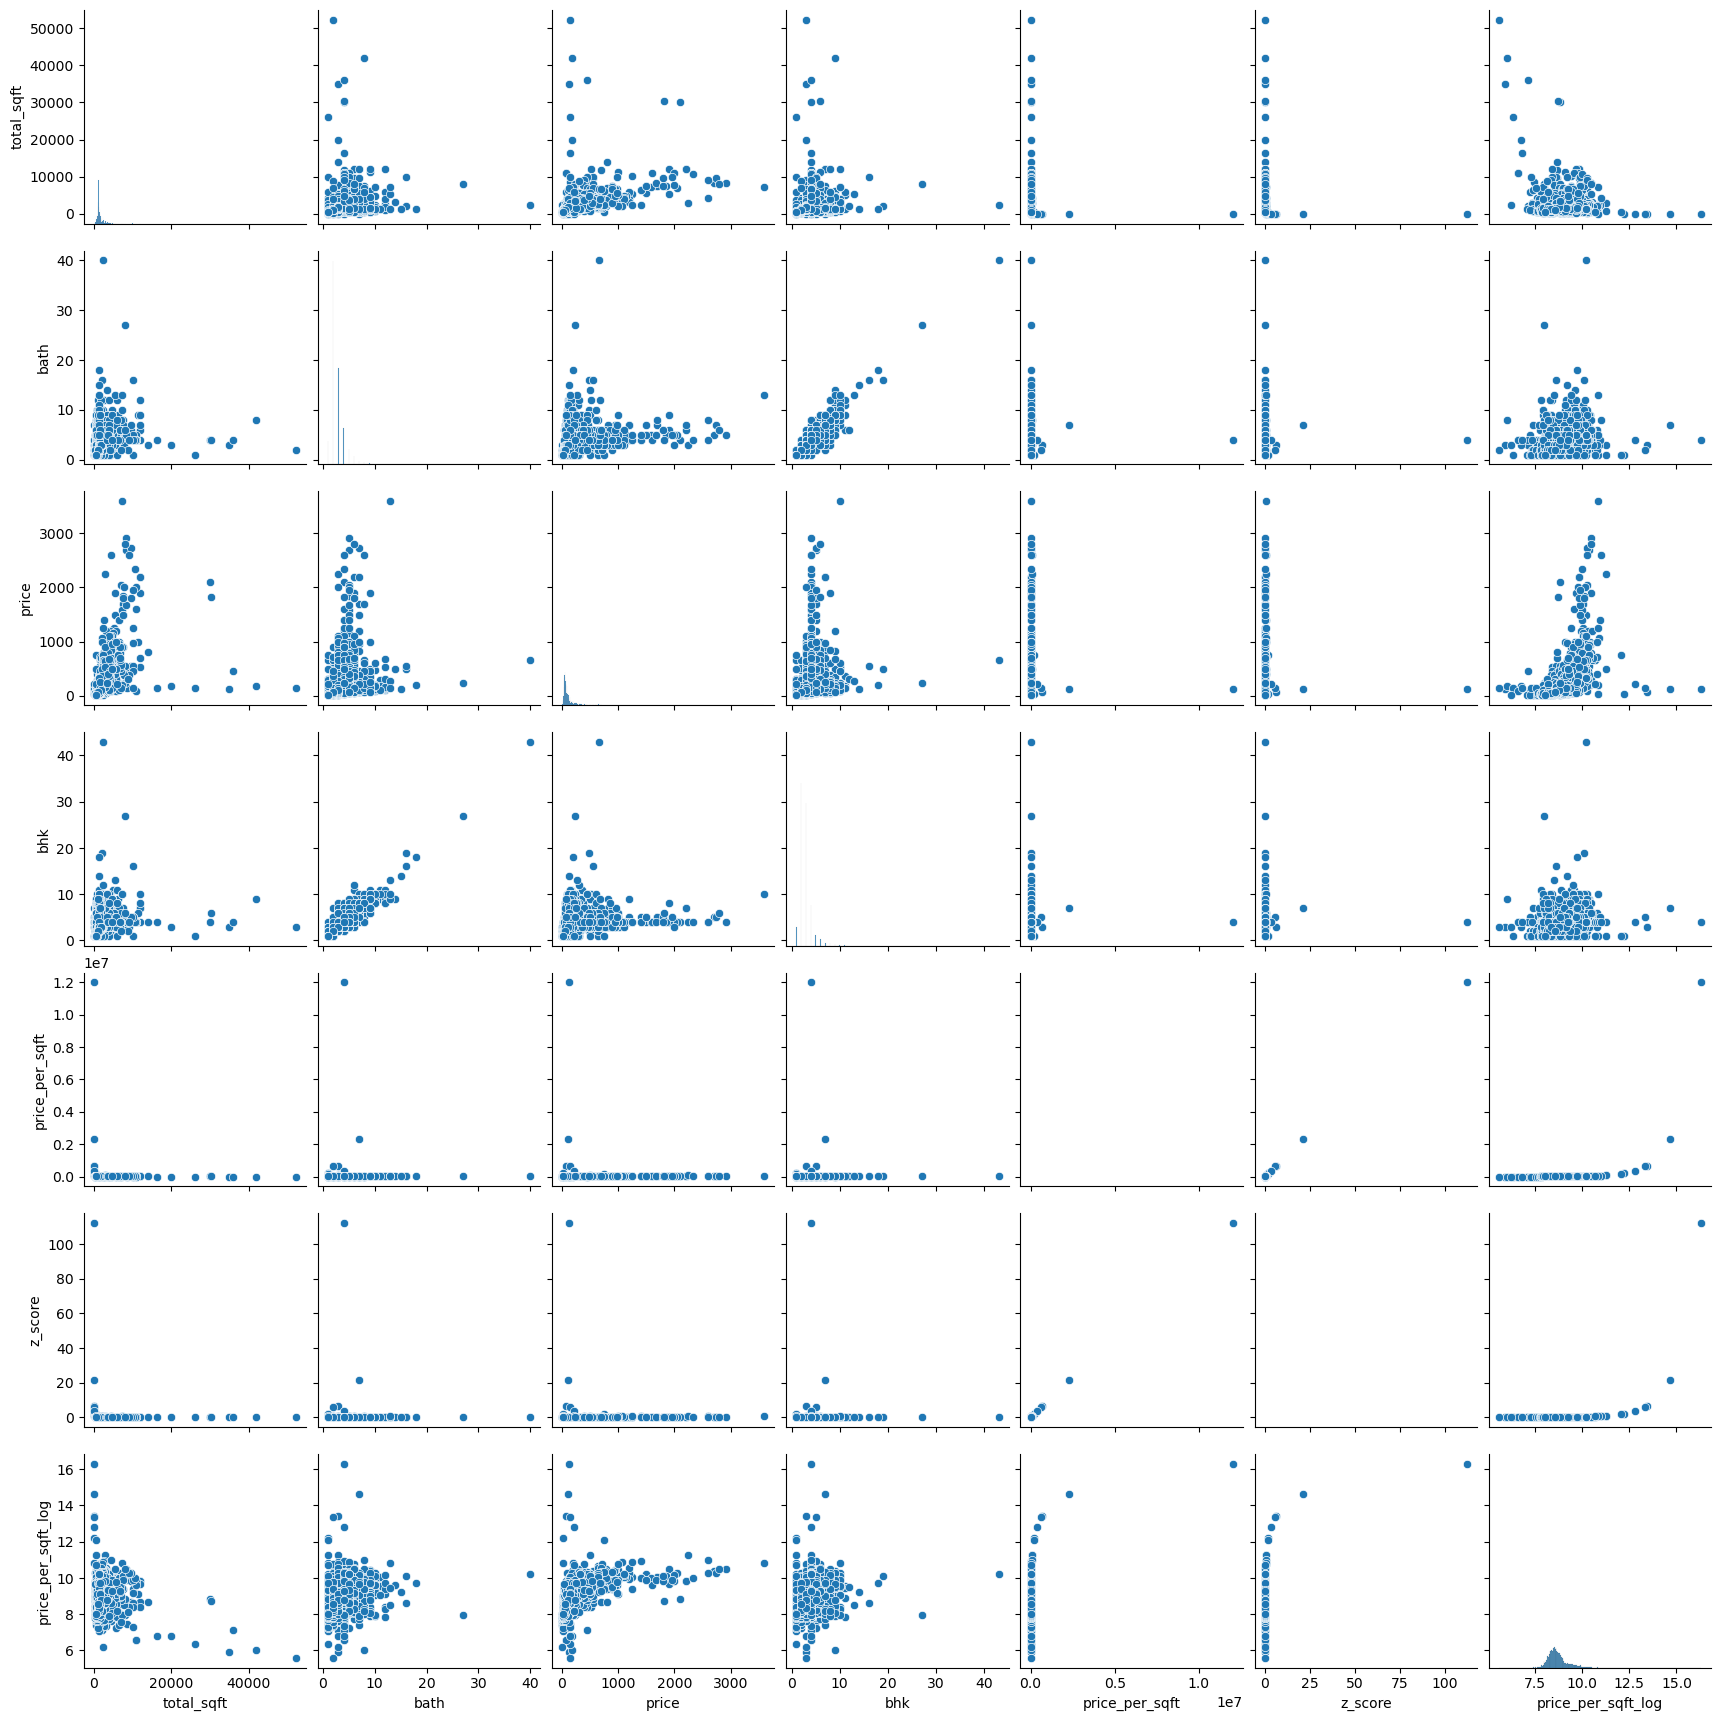

In [23]:
plt.figure(figsize=(14, 10))
sns.pairplot(numerical_data)
plt.show()